In [21]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import urllib

pd.options.display.max_columns = 999

In [22]:
#Load in the Wikipedia table data
url = "https://en.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_2024_United_States_presidential_election" 

html_content = urllib.request.urlopen(url).read()

# Parse the HTML content with BeautifulSoup

soup = BeautifulSoup(html_content, 'html5lib')
table_dat = soup.find_all('table')


In [23]:
rfk_table = table_dat[10]

rfk_table_data = []
for row in rfk_table.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    rfk_table_data.append(row_data)

#Convert table data to a dataframe
#We remove the first row since this is RCP summary data that we don't want to use
    
rfk = pd.DataFrame(rfk_table_data[1:], columns=rfk_table_data[0])

rfk["Year"] = rfk["Date"].str.split(" ").str[-1]
rfk["Month"] = rfk["Date"].str.split(" ").str[0]
rfk["Day"] = rfk["Date"].str.split(" ").str[1].str.split("–").str[0]
rfk["New Date"] = rfk["Month"] + " " + rfk["Day"] + ", " + rfk["Year"]
rfk["New Date"] = pd.to_datetime(rfk["New Date"],format="mixed")
rfk['JoeBidenDemocratic'] = rfk['JoeBidenDemocratic'].str.rstrip('%').astype('float') / 100
rfk['DonaldTrumpRepublican'] = rfk['DonaldTrumpRepublican'].str.rstrip('%').astype('float') / 100
rfk["Robert F.Kennedy Jr.Independent"] = rfk["Robert F.Kennedy Jr.Independent"].str.rstrip('%').astype('float') / 100
rfk.set_index("New Date", inplace=True)
rfk.drop("2023-10-09", inplace=True)
rfk["Spread"] = rfk["DonaldTrumpRepublican"] - rfk["JoeBidenDemocratic"]
rfk.head()

,Poll source,Date,Samplesize[b],Marginof error,JoeBidenDemocratic,DonaldTrumpRepublican,Robert F.Kennedy Jr.Independent,Other/Undecided,Year,Month,Day,Spread
New Date,,,,,,,,,,,,
2024-01-03,Reuters/Ipsos,"January 3–9, 2024","4,677 (RV)",± 1.5%,0.29,0.30,0.18,23%,2024,January,3,0.01
2023-12-14,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.38,0.36,0.22,4%,2023,December,14,-0.02
2023-12-06,Rasmussen Reports,"December 6–7 & 10, 2023",892 (LV),± 3.0%,0.32,0.40,0.16,12%[j],2023,December,6,0.08
2023-12-05,Cygnal (R),"December 5–7, 2023","2,000 (LV)",± 2.16%,0.42,0.43,0.09,6%,2023,December,5,0.01
2023-11-15,Harvard/Harris,"November 15–16, 2023","2,851 (RV)",–,0.36,0.44,0.21,0%,2023,November,15,0.08


In [24]:
jbdt_table_2023 = table_dat[8]
jbdt_table_2024 = table_dat[7]

jbdt_table_2023_data = []
for row in jbdt_table_2023.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    jbdt_table_2023_data.append(row_data)

jbdt_table_2024_data = []
for row in jbdt_table_2024.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    jbdt_table_2024_data.append(row_data)

    
jbdt_2023 = pd.DataFrame(jbdt_table_2023_data[1:], columns=jbdt_table_2023_data[0])
jbdt_2024 = pd.DataFrame(jbdt_table_2024_data[1:], columns=jbdt_table_2024_data[0])
jbdt = pd.concat([jbdt_2023, jbdt_2024])
jbdt["Year"] = jbdt["Date"].str.split(" ").str[-1]
jbdt["Month"] = jbdt["Date"].str.split(" ").str[0]
jbdt["Day"] = jbdt["Date"].str.split(" ").str[1].str.split("–").str[0]
jbdt['JoeBidenDemocratic'] = jbdt['JoeBidenDemocratic'].str[:2].astype('float') / 100
jbdt['DonaldTrumpRepublican'] = jbdt['DonaldTrumpRepublican'].str[:2].astype('float') / 100
jbdt["Spread"] = jbdt["DonaldTrumpRepublican"] - jbdt["JoeBidenDemocratic"]
jbdt["New Date"] = jbdt["Month"] + " " + jbdt["Day"] + ", " + jbdt["Year"]
jbdt["New Date"] = pd.to_datetime(jbdt["New Date"],format="mixed")
jbdt.head()

,Poll source,Date,Samplesize[b],Marginof error,JoeBidenDemocratic,DonaldTrumpRepublican,Other/Undecided,Year,Month,Day,Spread,New Date
0,ActiVote,"December 13–19, 2023",841 (LV),± 3.4%,0.46,0.54,–,2023,December,13,0.08,2023-12-13
1,McLaughlin & Associates,"December 13–19, 2023","1,000 (LV)",–,0.44,0.47,10%,2023,December,13,0.03,2023-12-13
2,The Economist/YouGov,"December 16–18, 2023","1,336 (RV)",± 3.2%,0.43,0.43,14%,2023,December,16,0.00,2023-12-16
3,YouGov/Yahoo News,"December 14–18, 2023","1,027 (RV)",–,0.44,0.44,12%,2023,December,14,0.00,2023-12-14
4,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.47,0.46,6%,2023,December,14,-0.01,2023-12-14


In [25]:
# Merge the two dataframes on new data

merged = pd.merge(rfk, jbdt, on="New Date", suffixes=('_RFK', '_JBDT'))
merged.head()

,New Date,Poll source_RFK,Date_RFK,Samplesize[b]_RFK,Marginof error_RFK,JoeBidenDemocratic_RFK,DonaldTrumpRepublican_RFK,Robert F.Kennedy Jr.Independent,Other/Undecided_RFK,Year_RFK,Month_RFK,Day_RFK,Spread_RFK,Poll source_JBDT,Date_JBDT,Samplesize[b]_JBDT,Marginof error_JBDT,JoeBidenDemocratic_JBDT,DonaldTrumpRepublican_JBDT,Other/Undecided_JBDT,Year_JBDT,Month_JBDT,Day_JBDT,Spread_JBDT
0,2024-01-03,Reuters/Ipsos,"January 3–9, 2024","4,677 (RV)",± 1.5%,0.29,0.30,0.18,23%,2024,January,3,0.01,Reuters/Ipsos,"January 3–9, 2024","4,677 (A)",± 1.5%,0.48,0.48,4%,2024,January,3,0.00
1,2024-01-03,Reuters/Ipsos,"January 3–9, 2024","4,677 (RV)",± 1.5%,0.29,0.30,0.18,23%,2024,January,3,0.01,I&I/TIPP,"January 3–5, 2024","1,247 (RV)",± 2.8%,0.40,0.41,19%,2024,January,3,0.01
2,2023-12-14,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.38,0.36,0.22,4%,2023,December,14,-0.02,YouGov/Yahoo News,"December 14–18, 2023","1,027 (RV)",–,0.44,0.44,12%,2023,December,14,0.00
3,2023-12-14,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.38,0.36,0.22,4%,2023,December,14,-0.02,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.47,0.46,6%,2023,December,14,-0.01
4,2023-12-06,Rasmussen Reports,"December 6–7 & 10, 2023",892 (LV),± 3.0%,0.32,0.40,0.16,12%[j],2023,December,6,0.08,Rasmussen Reports,"December 6–10, 2023",892 (LV),± 3.0%,0.38,0.48,14%[f],2023,December,6,0.10


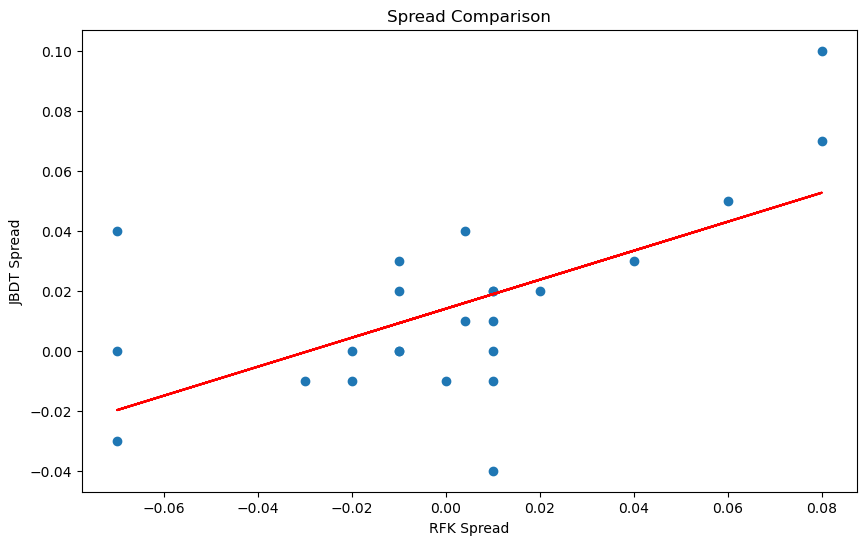

In [26]:
#Scatterplot the two different spreads

plt.figure(figsize=(10,6))
plt.scatter(merged["Spread_RFK"], merged["Spread_JBDT"])
# add trendline

z = np.polyfit(merged["Spread_RFK"], merged["Spread_JBDT"], 1)
p = np.poly1d(z)
plt.plot(merged["Spread_RFK"],p(merged["Spread_RFK"]), color="red")
plt.title("Spread Comparison")
plt.xlabel("RFK Spread")
plt.ylabel("JBDT Spread")
plt.show()